### Configuration

In [1]:
# Package Imports
import pandas as pd, numpy as np, xgboost as xgb
import json
import ast
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Missing Grade Prediction File Config
train_path = ".../training.json"

response_col = 'Mathematics'
identifier_cols = ['serial']
predictor_cols = ['Accountancy', 'Biology', 'BusinessStudies',
                  'Chemistry', 'ComputerScience', 'Economics',
                  'English', 'PhysicalEducation', 'Physics']

params = {}
params['objective'] = 'reg:linear'
params['booster'] = 'gbtree'
params['eval_metric'] = 'mae'
params['eta'] = 0.07
params['max_depth'] = 13
params['min_child_weight'] = 40
params['colsample_bytree'] = 0.5
params['colsample_bylevel'] = 0.5
params['subsample'] = 0.4
params['reg_lambda'] = .1
params['min_split_loss'] = 2

### Define Model Functions

In [2]:
def read_strangely_formatted_json(file_path):
    """
    > read uniquely formatted json file and return dataframe object
    """
    json_lines = []
    for i, ln in enumerate(open(file_path, 'r')):
        if i != 0:
            json_lines.append(ast.literal_eval(ln))
    return pd.DataFrame.from_dict(json_lines)

def prep_training_data(df, y_col, x_cols, miss_cutoff = 0.8):
    """
    > dummy code missingness in independent variables prior to modeling
    > exclude variables with missing % greater than <miss_cutoff>
    > note that this technique would not be appropriate for parametric models
    """
    # missingness binary variables
    miss_val_cols = []
    remain_x_cols = []
    for xc in x_cols:
        binary_vals = [int(math.isnan(df[xc][i])) for i in range(df.shape[0])]
        if (sum(binary_vals) / df.shape[0]) < miss_cutoff:
            miss_val_cols.append(pd.DataFrame({"{c}_Missing".format(c = xc): binary_vals}))
            remain_x_cols.append(xc)
        else:
            print("{field} excluded for having > {x}% missing values".format(field = xc,
                  x = str(int(miss_cutoff * 100))))
            
    miss_val_df = pd.concat(miss_val_cols, axis = 1)
    # concatenate existing and newly created fields
    output_df = pd.concat([df[y_col],
                           df[remain_x_cols].fillna(0),
                           miss_val_df],
    axis = 1)    
    return output_df

def get_validation_subset(df, y_col, validation_perc = 0.1, test_perc = 0.2):
    """
    > split training set into train and validation subsets
    > format as DMatrix objects
    """
    y = df[y_col].values
    x = df[[c for c in df.columns if c != y_col]].values
    y_trn, y_val, x_trn, x_val = train_test_split(y, x, test_size = validation_perc)
    y_trn, y_tst, x_trn, x_tst = train_test_split(y_trn, x_trn, test_size = test_perc)
    return y_trn, y_val, y_tst, x_trn, x_val, x_tst

def score_predictions(pred_vals, actual_vals):
    """
    Per Hackerrank:
    
    'Scoring

    For each of the N records in the input file, we will compute:
    p = abs(Predicted Grade Point in Mathematics - Actual Grade Point in Mathematics)
    Where 'abs' indicates the Absolute Value or Magnitude. If p = 0 or 1 your answer for that particular student
    record will be considered correct. i.e, we allow a tolerance of one grade point away from the correct answer,
    to take into consideration the marginal errors which might occur during the testing or grading process.
    Score = 100 * ((C-W)/N) 
    Where C = Number of Correct predictions, not more than one grade point away from the actual grade point assigned. 
    W = Number of wrong (incorrect) predictions and 
    N = Total number of records in the input.'
    """
    # Hackerrank Scoring
    p = [int(abs(pred_vals[i] - actual_vals[i])) for i, x in enumerate(pred_vals)]
    c = len([x for x in p if x in [0,1]])
    w = len(p) - c
    n = len(pred_vals)
    score = 100 * ((c-w)/n)
    print_str = "\nHackerrank-Calculated Score: {sc}\n\n".format(sc = str(round(score,2)))
    # Error Distribution
    e = [pred_vals[i] - actual_vals[i] for i, x in enumerate(pred_vals)]
    plt.hist(e, bins = 50, alpha = 0.5, color = 'g', edgecolor = 'g')
    plt.axvline(x = -1)
    plt.axvline(x = 1)
    plt.title('Error Distribution on Test Subset')
    print(print_str)

### Execute Model Functions

Accountancy excluded for having > 80% missing values
Biology excluded for having > 80% missing values
BusinessStudies excluded for having > 80% missing values
Economics excluded for having > 80% missing values
[21:32:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[21:32:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 12 pruned nodes, max_depth=11
[21:32:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 42 pruned nodes, max_depth=13
[21:32:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[21:32:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[21:32:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[21:32:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6


[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 38 pruned nodes, max_depth=13
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 12 pruned nodes, max_depth=13
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 2 pruned nodes, max_depth=6
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 96 pruned nodes, max_depth=13
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 10 pruned nodes, max_depth=6
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 46 pruned nodes, max_depth=10
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 136 pruned nodes, max_depth=13
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 58 pru

[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 90 pruned nodes, max_depth=12
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=5
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 20 pruned nodes, max_depth=8
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 8 pruned nodes, max_depth=7
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 2 pruned nodes, max_depth=0
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 12 pruned nodes, max_depth=2
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 6 pruned nodes, max_depth=5
[21:32:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max

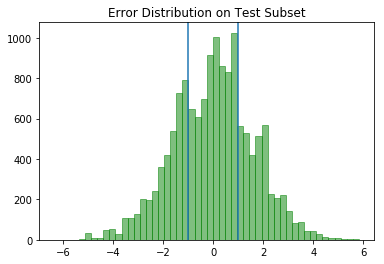

In [3]:
temp_df = read_strangely_formatted_json(train_path)
prep_df = prep_training_data(df = temp_df, y_col = response_col, x_cols = predictor_cols)
y_trn, y_val, y_tst, x_trn, x_val, x_tst = get_validation_subset(df = prep_df, y_col = response_col)
model_obj = xgb.train(params = params,
                      dtrain = xgb.DMatrix(x_trn, label = y_trn),
                      num_boost_round = 1000,
                      evals = [(xgb.DMatrix(x_trn, label = y_trn), 'train'),
                               (xgb.DMatrix(x_val, label = y_val), 'valid')],
                      early_stopping_rounds = 12,
                      verbose_eval = 0)

prediction = model_obj.predict(xgb.DMatrix(x_tst))
score_predictions(prediction, y_tst)

### Define and Execute countNonUnique Function

In [4]:
def countNonUnique(numbers):
    """
    > return integer representing the number of non-unique items in a list
    """
    non_unique = []
    for n in set(numbers):
        if numbers.count(n) > 1:
            non_unique.append(n)
    return int(len(non_unique))

countNonUnique([1,2,3,3,3,4,5,6,6])

2

### Define and Execute countNonUnique Function

In [5]:
def listMax(n, operations):
    """
    > sequential array manipulation function
    > details: https://www.hackerrank.com/challenges/crush/problem
    """
    start_list = [0] * n
    all_lists = [start_list]
    for o in operations:
        new_vals = []
        for i, x in enumerate(all_lists[-1]):
            if (i >= (o[0]-1)) and (i <= (o[1]-1)):
                new_vals.append(x + o[2])
            else:
                new_vals.append(x)
                
        all_lists.append(new_vals)    
    max_val = max([max(v) for v in all_lists])
    return max_val
            
            
listMax(5, [[2,3,100], [1,3,275], [2,5,25]])

400